# Dipole field plot

Contour plot of the equipotential surfaces of the electric field of a point-like dipole. The field is accurately computed from a physical model. The dipole points in x-direction.

From https://commons.wikimedia.org/wiki/File:DipoleContourPoint.svg

By Geek3, licensed under the Creative Commons Attribution-Share Alike 4.0 International license.

/var/folders/9s/6fvdmxlx00z9sz6ftkrnh8dw0000gn/T/ipykernel_60090/1498784851.py:6: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in qcset.collections:


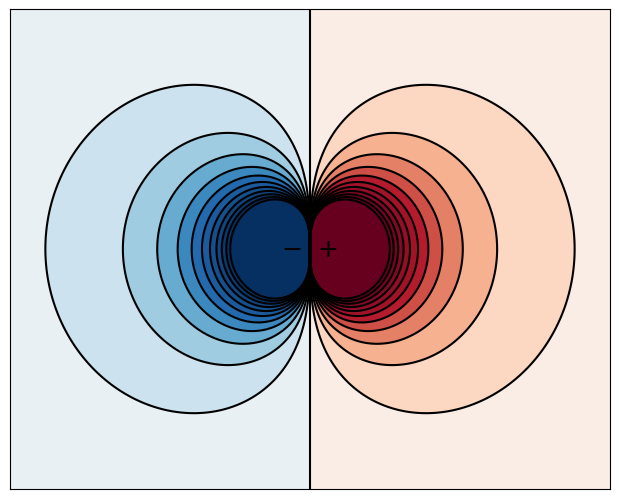

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

def simplify_contours(qcset, thresh=plt.rcParams['path.simplify_threshold']):
    for c in qcset.collections:
        paths = c.get_paths()
        for i, p in enumerate(paths):
            p.simplify_threshold = thresh / plt.gcf().dpi
            paths[i] = p.cleaned(simplify=True)

# dipole in x-direction
p = np.array([1., 0.])

xmax = 2.5
ymax = 2.0
vmax = 0.18
ngrid = 400
levels = np.linspace(-vmax, vmax, 23)
X, Y = np.mgrid[-xmax:xmax:ngrid*1j, -ymax:ymax:int(ngrid*ymax/xmax)*1j]
# formula for dipole potential https://en.wikipedia.org/wiki/Dipole#Field_from_an_electric_dipole
V = np.dstack((X, Y)).dot(p) / (4. * np.pi * np.hypot(X, Y)**3)
V = np.clip(V, -2.*vmax, 2.*vmax)

plt.figure(figsize=(6, 6 * ymax / xmax)).add_axes([0, 0, 1, 1])
contf = plt.contourf(X, Y, V, levels=levels, cmap='RdBu_r', extend='both',
       norm=colors.SymLogNorm(linthresh=0.5*vmax, vmin=-vmax, vmax=vmax))
simplify_contours(contf, 0.8*plt.rcParams['lines.linewidth'])
cont = plt.contour(X, Y, V, levels=contf.levels, colors='k', linestyles='solid')
plt.xticks([]), plt.yticks([])
plt.gca().set_aspect(aspect='equal')
for i in -1,1:
    plt.text(0.15*i, 0, {-1:u'\u2212', 1:'+'}[i], size=18, ha='center', va='center')
plt.savefig('DipoleContourPoint.svg', bbox_inches='tight', transparent=True,
            edgecolor='none')

# An example script that generates a picture of the field lines for an electric dipole

possible types:
    
```python
'homogeneous': [Fx, Fy]
'monopoles': [x, y, charge]
'dipoles': [x, y, phi, q]
'quadrupoles': [x, y, phi, q]
'wires': [x, y, I]
'charged_planes': [x0, y0, x1, y1, charge]
'ringcurrents': [x0, y0, phi, R, I]
'coils': [x0, y0, phi, R, Lhalf, I]
'custom': user defined function
```

In [ ]:
'''An example script that generates a picture of the field lines for an electric dipole.'''

import math
import vectorfieldplot as vfp


# create a document. we specify the file name and image size here
doc = vfp.FieldplotDocument( 'ElectricDipole', width=1600,height=1600,unit=100)

# create a field opbject
field = vfp.Field()
# add the point charges
# field.add_element('monopoles' , [ [ 1, 0,  1]  # the positive charge
#                                 , [-1, 0, -1]  # the negative charge
#                                 ] )

field.add_element('dipoles' , [ [ 1, 0,  1] # the negative charge
                                ] )

# draw the charges for the field on the document
doc.draw_charges(field)

# start drawing the field lines
# we are going to draw 20 field lines coming off of the positive charge at uniformly spaced angles.
N = 20
for i in range(N):
    # compute the angle that the line will start off at
    angle = i * 2.*math.pi / (N-1)
    # generate the line
    # this takes the initial position, the x and y components of the initial direction, and whether or not should go forward
    # or backward.
    line = vfp.FieldLine( field, [1,0], start_v=[math.cos( angle ) , math.sin( angle )],directions='forward' )
    # draw the line on the document
    doc.draw_line(line,arrows_style={'min_arrows':1,'max_arrows':1})


# write the document
doc.write()

In [ ]:
? vfp.Field
